Problem Statement:

This is a Sentiment Analysis problem where based on the verified_reviews of the customer we have to verify whether the is satisfied(1) with the product or not(0).
Naive Bayes Classifier has been used in this problem since NB classifier gives very good results in text classification.At the end we did try with Logistic Regression Classifier too.

In [23]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Load the dataset

reviews_df = pd.read_csv("C:/users/punam/OneDrive/Desktop/Punam/Taskimpetus/Labs/Source/ML/CaseStudy3/amazon_alexa.tsv", sep='\t')

In [25]:
# Check random rows of the dataframe by using .sample()

reviews_df.sample(5)

,rating,date,variation,verified_reviews,feedback
2596,5,30-Jul-18,Black Dot,I use the echo dot several different ways in m...,1
1613,5,29-Jul-18,Black Show,Super fun !! I ty is what I was expecting,1
457,4,2-Jul-18,Black,Does everything I have asked it.,1
2022,5,19-Jul-18,Black Plus,"Pretty cool device. Still have a lot to learn,...",1
184,5,29-Jul-18,Charcoal Fabric,My mom bought a few Echo Dots and repeated ask...,1


In [26]:
# Note the info of the dataset

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


1. The dataset consists of 3150 rows and 5 columns.
2. 'rating' & 'feedback' is integer data type whereas the rest 3 columns are object type.
3. There are no null values in the dataset.

In [27]:
# Get the statistical details of the dataset using .describe()

reviews_df.describe().round(2)

,rating,feedback
count,3150.00,3150.00
mean,4.46,0.92
std,1.07,0.27
min,1.00,0.00
25%,4.00,1.00
50%,5.00,1.00
75%,5.00,1.00
max,5.00,1.00


1. 'feedback' has minimum value as 0 and maximum as 1.
2. More than 25% customers have given feedback as 1 which indicates satisfied customers. This is also indicated by mean value which is 0.92.
3. 'rating' has a minimum value of 1 and maximum value of 5.
4. Only 25% customers have given a rating of 4 and below. Rest 75% customers have given a rating of 5.It is evident from the mean value which is 4.46. This can further be verified by using a histogram.

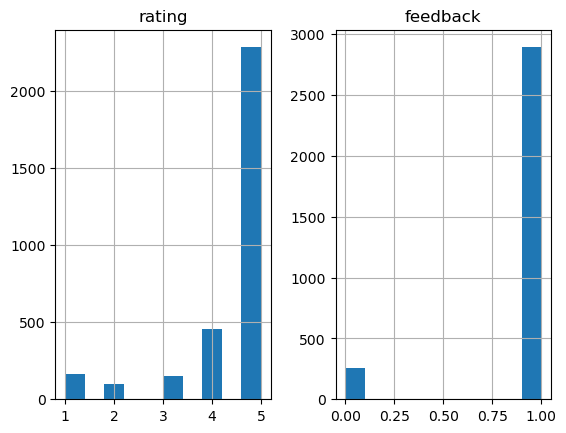

In [28]:
# .hist() plots histogram of all the features which have integer datatype

reviews_df.hist()
plt.show()

<Axes: xlabel='feedback', ylabel='count'>

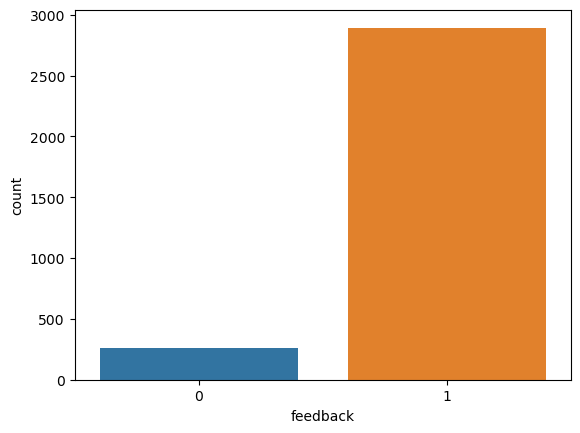

In [29]:
sns.countplot(x='feedback',data=reviews_df)

<Axes: xlabel='rating', ylabel='count'>

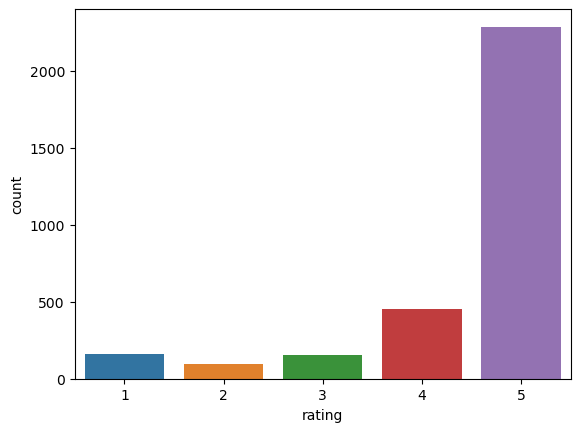

In [30]:
sns.countplot(x='rating', data= reviews_df)

In [31]:
reviews_df.describe(include='O')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [32]:
reviews_df['feedback'].unique()

array([1, 0], dtype=int64)

'feedback' column has two unique values as 1 & 0.

In [33]:
# Let us check which values of 'rating' corresponds to 0 'feedback'

reviews_df[reviews_df['feedback']==0]['rating'].unique()    # This provides unique values of rating where the feedback is 0 

array([2, 1], dtype=int64)

When the rating is provided as 1 & 2 values, then the feedback is valued as 0 corresponding to dissatisfied customer.

In [34]:
# Let us check which values of 'rating' corresponds to 1 'feedback'

reviews_df[reviews_df['feedback']==1]['rating'].unique()

array([5, 4, 3], dtype=int64)


When the rating is provided as 5,4 & 3 values, then the feedback is valued as 1 corresponding to satisfied customer. Here maximum frequency is of 5 rating hence it appears first in the list.

In [35]:
# Let us check the dataset for 'feedback' ==1

reviews_df[reviews_df['feedback']==1]

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


We can see that where the feedback is marked as 1, the verified_reviews are all positive. Also the rating it corresponds to is either 3, 4 or 5.

In [36]:
# Let us check the dataset for 'feedback' ==0

reviews_df[reviews_df['feedback']==0]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


We can see that where the feedback is marked as 0, the verified_reviews are all negative indicating unsatisfied customers. Also, the rating it corresponds to is either 1 or 2.

In [37]:
# Let us make a new column called 'length' which indicates the number of characters in the message.
# Use .apply(len) to measure length of a series 

reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.sample()

,rating,date,variation,verified_reviews,feedback,length
1642,3,29-Jul-18,Black Show,I like the weather options but Alexa search co...,1,372


In [38]:
reviews_df['length'].describe().round(2)

count    3150.00
mean      132.05
std       182.10
min         1.00
25%        30.00
50%        74.00
75%       165.00
max      2851.00
Name: length, dtype: float64

The maximum length of any verified_review is 2851 and the minimum length is 1 character.

<Axes: ylabel='Frequency'>

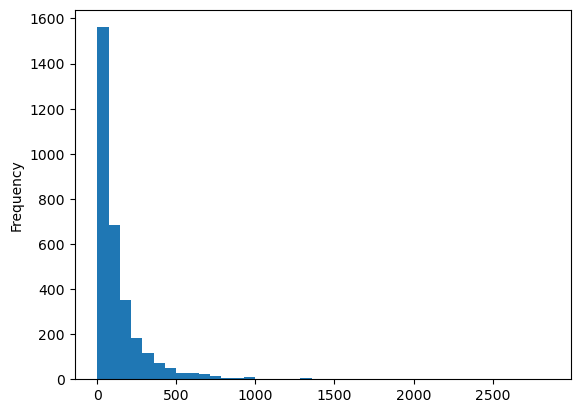

In [39]:
# Let us plot a histogram to see the different length of the messages

reviews_df['length'].plot(bins=40, kind='hist')

Above histogram shows that more than 1500 reviews are quite brief and have shorter length.

In [40]:
# let us check the longest review

reviews_df[reviews_df['length']==2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [41]:
# Let us check the shortest review

reviews_df[reviews_df['length']==1]['verified_reviews'].iloc[0]

'😍'

In [42]:
# Let us check the first review with mean length

reviews_df[reviews_df['length']== 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [43]:
# Let us check all reviews with mean length
reviews_df[reviews_df['length']== 133]

,rating,date,variation,verified_reviews,feedback,length
28,4,30-Jul-18,Charcoal Fabric,Fun item to play with and get used to using. ...,1,133
723,4,30-Jul-18,Charcoal Fabric,Fun item to play with and get used to using. ...,1,133
1774,5,30-Jul-18,Black Plus,This is my 3rd Echo and with the built in hub ...,1,133
1794,5,29-Jul-18,Black Plus,Love the Echo Plus!! Much better versatility t...,1,133
1853,5,28-Jul-18,White Plus,Comes with a hub. Got it during prime day for...,1,133
1926,3,26-Jul-18,Black Plus,Mic hears everything but only understands abou...,1,133


In [44]:
# Let us create two different dataframes for feedback 0 & 1 as negative and positive respectively

positive = reviews_df[reviews_df['feedback']==1]
negative = reviews_df[reviews_df['feedback']==0]

In [45]:
# To check all the positive reviews use .to_string()

positive['verified_reviews'].to_string()   # we use the to_string() method to convert a column in our pandas DataFrame to a text of string output in Python.

'0                                           Love my Echo!\n1                                               Loved it!\n2       Sometimes while playing a game, you can answer...\n3       I have had a lot of fun with this thing. My 4 ...\n4                                                   Music\n5       I received the echo as a gift. I needed anothe...\n6       Without having a cellphone, I cannot use many ...\n7       I think this is the 5th one I\'ve purchased. I\'...\n8                                             looks great\n9       Love it! I’ve listened to songs I haven’t hear...\n10      I sent it to my 85 year old Dad, and he talks ...\n11      I love it! Learning knew things with it eveyda...\n12      I purchased this for my mother who is having k...\n13                                     Love, Love, Love!!\n14                               Just what I expected....\n15                              I love it, wife hates it.\n16      Really happy with this purchase.  Great speak

In [46]:
# Let us check different model variation of Alexa

reviews_df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [47]:
len(reviews_df['variation'].unique()) # gives the number of unique devices present in the variation column

16

<Axes: xlabel='variation', ylabel='rating'>

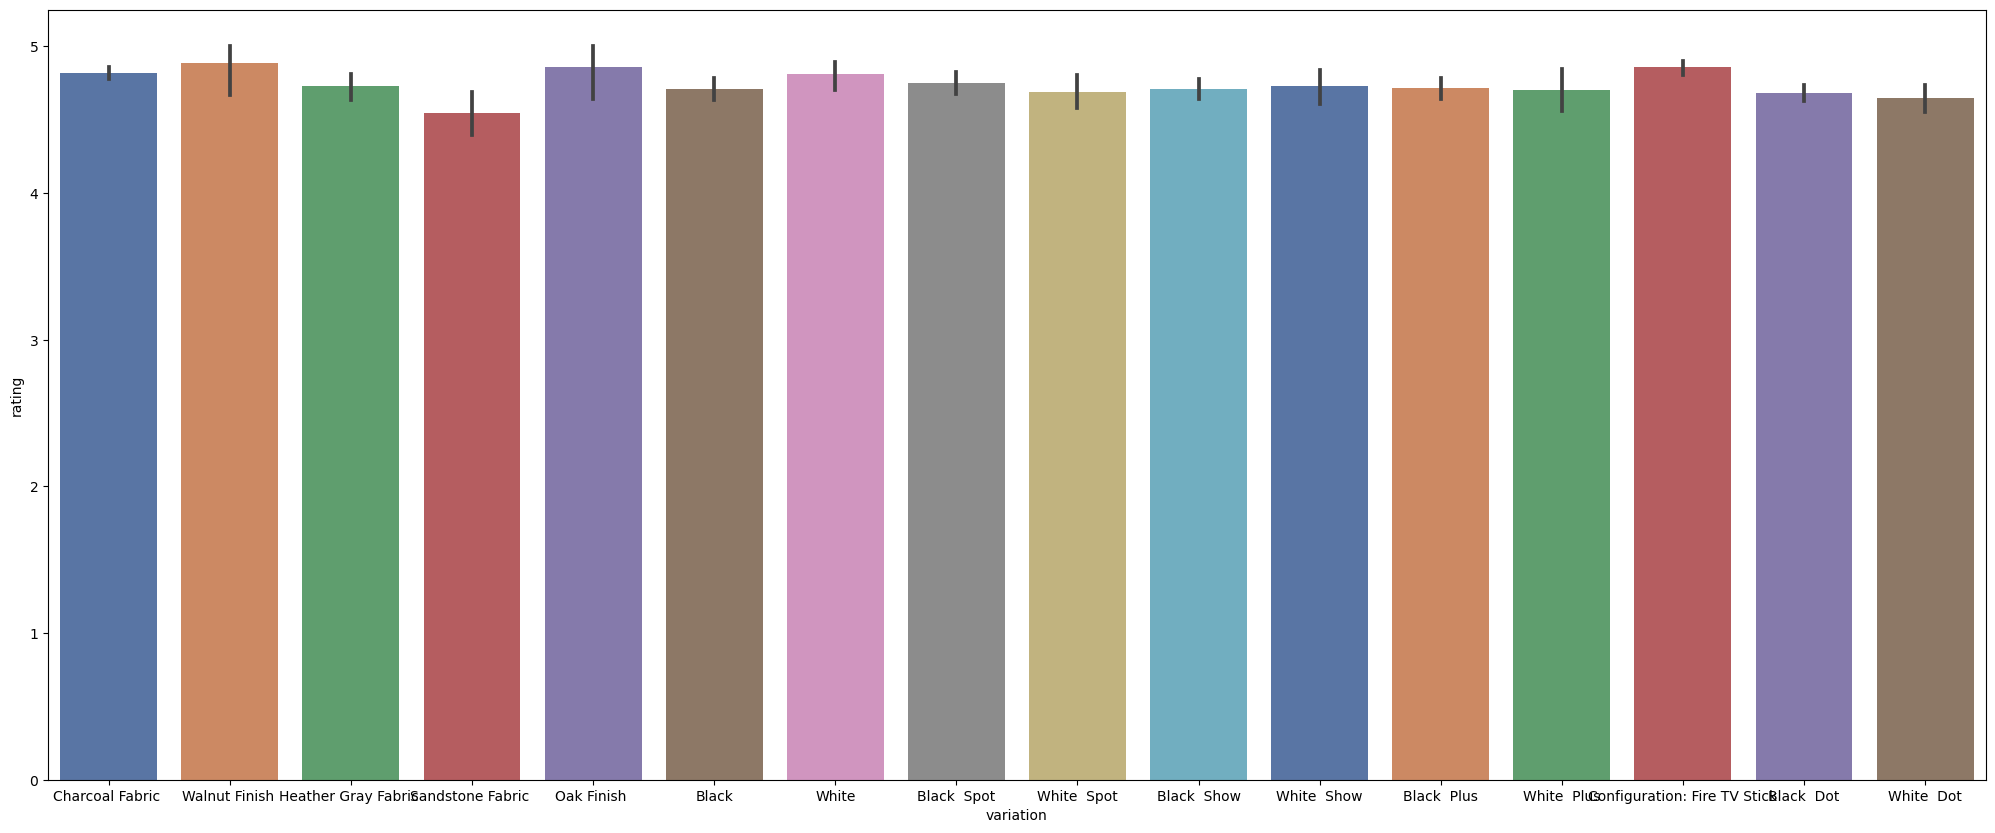

In [48]:
# If we want to identify which variations have outshone others

plt.figure(figsize= (25,10))
sns.barplot(x='variation', y='rating', data= positive, palette='deep')

In [49]:
# Using .tolist() method, each row in the DataFrame will be converted to a list and the list of lists represents the entire DataFrame.

sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

3150

In [50]:
print(sentences)

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [51]:
# In order to make all the above sentences into a single sentence use .join()
# The " ".join() method takes all items in an iterable and joins them into one string using a space.

single_string = " ".join(sentences)

In [52]:
single_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


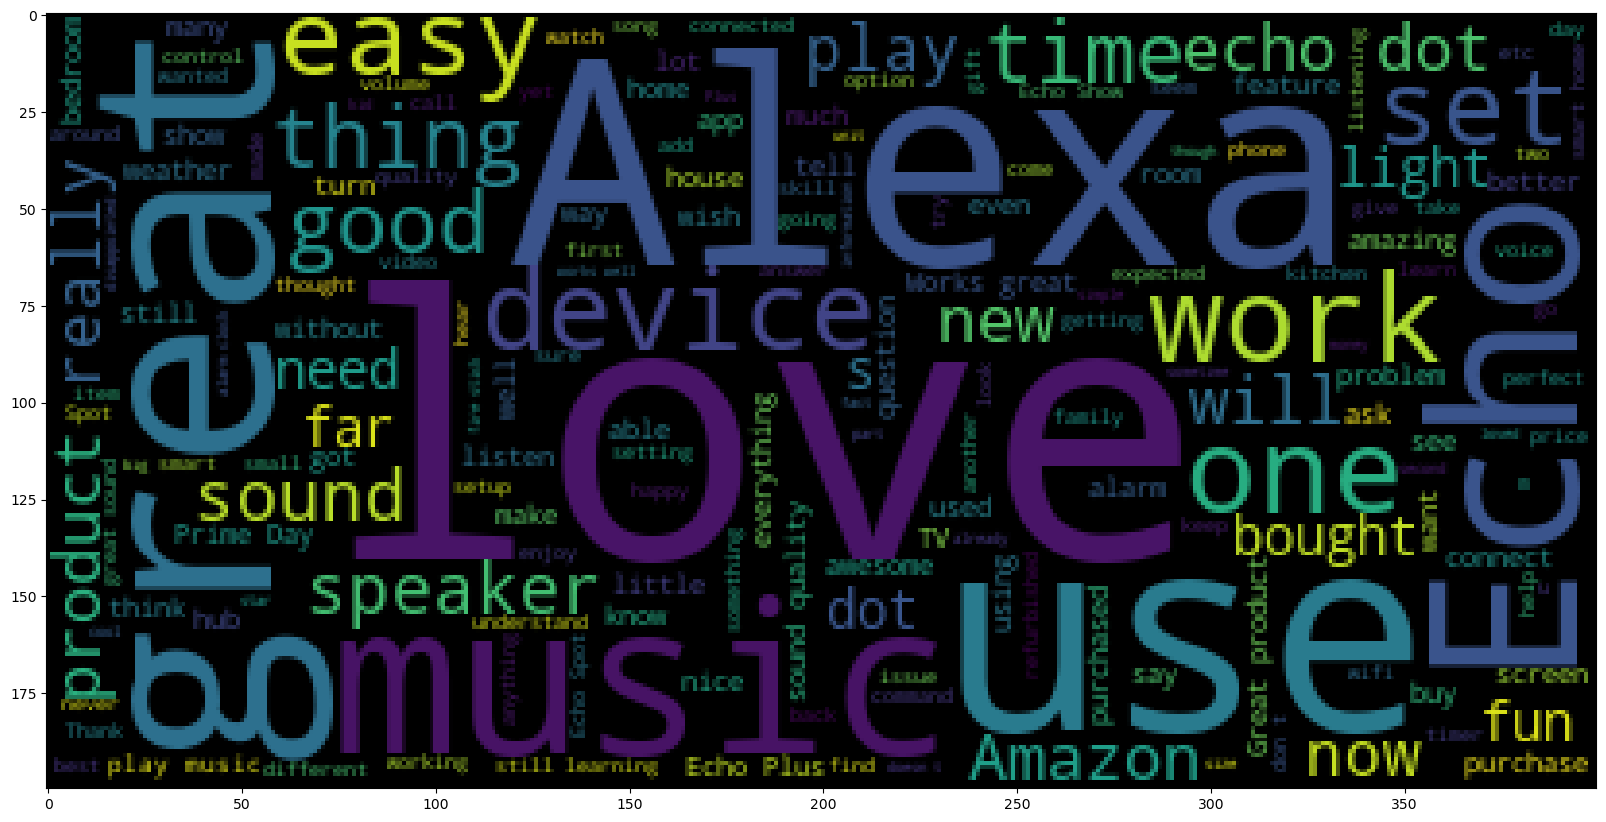

In [53]:
# To check most popular words we can make a word cloud
!pip install wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(single_string))

In [54]:
# Data Cleansing
# Drop the unnecessary data columns like date, length (which we created to study the reviews), rating (because we already have verified_reviews which are a better predictor of the target column)

reviews_df = reviews_df.drop(['date','rating','length'],axis=1)

In [55]:
reviews_df.head(4)

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1


In [56]:
# Let us provide dummy variables to the different device variation
# To avoid dummy variable trap, which means that one variable can be predicted from the other, use drop+first = True

variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)

In [57]:
variation_dummies.head(4) # There were total 16 devices. One of them have been dropped.

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
# Now let us first drop the variation column

reviews_df.drop(['variation'], axis=1, inplace= True)

In [59]:
reviews_df.head(4)

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1


In [60]:
# Now let us concatenate the encoded dummy columns to the dataframe

reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)

In [61]:
reviews_df.head(4)

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [62]:
# To remove punctuation marks from the text import string module

import string
string.punctuation    # dispalys the list of punctuation marks

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
#  To remove the stopwords from the text import nltk

import nltk  # Natural Language Tool Kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\punam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords  # To execute this command, it is necessary to download stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [77]:
# Let us define a pipieline to clean up all the messages.
# The pipeline should perform the following functions: (i) remove punctuations, (ii) remove stopwords

def message_cleaning(statement):
    punc_removal = [char for char in statement if char not in string.punctuation]
    punc_removal_join = ''.join(punc_removal) 
    punc_stopwords_clean = [word for word in punc_removal_join.split() if word.lower() not in stopwords.words('english')]
    return punc_stopwords_clean

# The "".join() method takes all items in an iterable and joins them into one string using a space.
# The split() method splits a string into a list.
# The lower() method returns a string where all characters are lower case.

In [78]:
# Let us check the newly added function pipeline
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [82]:
print(reviews_df_clean[7]) # shows the cleaned up sentence

['think', '5th', 'one', 'Ive', 'purchased', 'Im', 'working', 'getting', 'one', 'every', 'room', 'house', 'really', 'like', 'features', 'offer', 'specifily', 'playing', 'music', 'Echos', 'controlling', 'lights', 'throughout', 'house']


In [83]:
print(reviews_df['verified_reviews'][7])  #shows the original sentence

I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.


In [84]:
reviews_df_clean.head(4)   # Gives you a glimpse of cleaned reviews

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
Name: verified_reviews, dtype: object

In [92]:
# Count Vectorization or Tokenization {Count vectorization is a process that counts the number of times each word appears in a document.}

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
vectorized_reviews = vectorizer.fit_transform(reviews_df['verified_reviews'])  # We have passed analyser, the user-defined function 'messge_cleaning'. So whenever we pass any value to the vectorizer, it will automatically remove the punctuations and stopwords as stated in the function.
print(vectorizer.get_feature_names_out())   #The get_feature_names_out() method in CountVectorizer returns the feature names for the output of the transformation.


['072318' '1' '10' ... '😬' '😳' '🤓']


In [93]:
vectorized_reviews.toarray() # converts each sentence into an array of 0 and 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [94]:
vectorized_reviews.shape   # provides the shape of the newly formed array

(3150, 5211)

In [97]:
reviews = pd.DataFrame(vectorized_reviews.toarray())

In [96]:
reviews_df.head(2)

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [98]:
# Since we have CountVectorized the 'verified_reviews', we can now safely drop it before concatenating the vectors

reviews_df.drop(['verified_reviews'], axis=1, inplace= True)

In [99]:
# Now let's concatenate them 

reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [100]:
reviews_df.head(2)

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Let us separate the independent and the dependent variables
X = reviews_df.drop(['feedback'],axis=1)
Y = reviews_df['feedback']
X.columns = X.columns.astype(str)  # To overcome the TypeError: Feature names are only supported if all input features have string names 

In [105]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

NAIVE BAYES CLASSIFICATION MODEL

In [110]:
# Train a Naive Bayes Classifier model

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()  # create an object
nb_model = nb.fit(X_train,Y_train)  # train the model

In [123]:
Y_pred = nb_model.predict(X_test)   # predict using the model

In [124]:
# Evaluate model's test accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print('Test accuracy: ',(accuracy_score(Y_test,Y_pred)*100).round(2),'%')
print('Test Confusion Matrix: ','\n\n',confusion_matrix(Y_test,Y_pred))
print('Test Classification Report:','\n\n', classification_report(Y_test,Y_pred))

Test accuracy:  92.59 %
Test Confusion Matrix:  

 [[ 24  64]
 [  6 851]]
Test Classification Report: 

               precision    recall  f1-score   support

           0       0.80      0.27      0.41        88
           1       0.93      0.99      0.96       857

    accuracy                           0.93       945
   macro avg       0.87      0.63      0.68       945
weighted avg       0.92      0.93      0.91       945



In [125]:
# Evaluate model's train accuracy_score, confusion_matrix and classification_report

Y_pred_train = nb_model.predict(X_train)
print('Train accuracy: ',(accuracy_score(Y_train,Y_pred_train)*100).round(2),'%')
print('Train Confusion Matrix: ','\n\n',confusion_matrix(Y_train,Y_pred_train))
print('Train Classification Report:','\n\n', classification_report(Y_train,Y_pred_train))

Train accuracy:  96.42 %
Train Confusion Matrix:  

 [[  97   72]
 [   7 2029]]
Train Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.57      0.71       169
           1       0.97      1.00      0.98      2036

    accuracy                           0.96      2205
   macro avg       0.95      0.79      0.85      2205
weighted avg       0.96      0.96      0.96      2205



The model seems to be overfit because it has better training accuracy but lesser test accuracy. The problem can also be due to imbalance in data. There is more of positive feedback as compared to the negative feedback.

LOGISTIC REGRESSION MODEL

In [128]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_model = lr.fit(X_train,Y_train)

In [129]:
Y_pred_lr = lr_model.predict(X_test)

In [136]:
print('Logistic Regression Accuracy score: {} %'.format(100*accuracy_score(Y_test, Y_pred_lr).round(4)))
print('Logistic Regression Confusion Matrix: ','\n\n',confusion_matrix(Y_test, Y_pred_lr))
print('Logistic Regression Classification Report:','\n\n', classification_report(Y_test, Y_pred_lr))

Logistic Regression Accuracy score: 92.91 %
Logistic Regression Confusion Matrix:  

 [[ 25  63]
 [  4 853]]
Logistic Regression Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.28      0.43        88
           1       0.93      1.00      0.96       857

    accuracy                           0.93       945
   macro avg       0.90      0.64      0.69       945
weighted avg       0.92      0.93      0.91       945



Test accuracy of Logistic Regresion seems to be at par with Naive Bayes classifier.
We should definitely check the model accuracy after balancing the data of both the classes.

Happy to acquire new skills :)